<a href="https://colab.research.google.com/github/hazmash5/Hazim-DS-projects/blob/main/Copy_22of_3_Hazim_Pima_Indians_Diabetes_89_4_Acc%2C_87_5_val_Acc(ML)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Pima Indians Diabetes Dataset**

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately **77%**.


# Step 1: Answering the question

In [1]:
# Get the dataset by raw URL
!wget https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv

--2022-01-26 21:28:37--  https://github.com/hazmash5/ds-projects/raw/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv [following]
--2022-01-26 21:28:37--  https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_05_Diabetes/data/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2022-01-26 21:28:37

In [2]:
# Create new folder and name it data
!mkdir data

In [3]:
# Moving our datasets to the data folder
!mv pima-indians-diabetes.csv data/

In [4]:
# Showing the first line of the dataset
!head -n 3 data/pima-indians-diabetes.csv

6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


We can notes the following:
1.	There is no header row so `header= None` must be used while we read the csv.
2.	There is no need to use `Sep parameter` because the separation between the values is (,) as the default separation of Panda csv Sep.


In [5]:
# Showing the number of lines.
!cat data/pima-indians-diabetes.csv | wc -l

767


We have 768 of instances

# Introduction
Several types of classification models algorithms were used to:
1.	Choose the best classification algorithms family, and make another comparison between the chosen algorithm types,
2.	Compare between the used techniques,
3.	Get wide range of choices based on the techniques and practical field.

In the following the used classification models:
1.	Logistic Regression
2.	Linear Discriminant Analysis
3.	K Neighbors Classifier
4.	Decision Tree Classifier
5.	Gaussian NB
6.	Support Vector Classifier
7.	XGBoost Classifier


# Step 2: EDA Exploratory Data Analysis 

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

In [8]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df

,No_preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Check duplicated rows
df.duplicated(keep='last').sum()

0

There is no duplicated rows

In [10]:
df.isnull().sum().sum()

0

There is no `NaN` values.

## **1.** Using pie plot
I used pie plot to visualize and compute the difference between the categories

In [11]:
color= ['#9999ff','#ff4d4d']

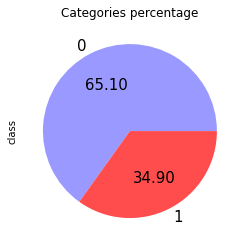

In [12]:
pd.value_counts(df['class']).plot(kind='pie',
                                  autopct='%.2f',fontsize=15,
                                  colors= color,
                                  title='Categories percentage', )

By using pie plot to visualize and compute the difference between the categories; we can notes the big difference between numbers of categories. There is an unbalance issue must be considered.

## **2.** Using box plot
I used box plot to have an indication of how the values in the data are spread out, and to visualize the distribution of values within each attributes.

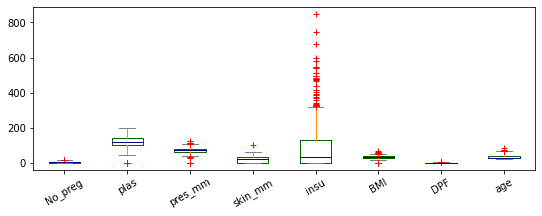

In [13]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df[df.columns[:-1]].plot(kind='box', color=color, sym='r+', figsize=(9,3), rot=30)


The attributes box plotting shows the following: 

1. All attributes values spread between 0 and 200 except E attribute,

2. There is no negative values,

3. E attribute have a lot of outliers exceed 200,

4. Each attribute have own distribution, so we must use scalers methods before training.

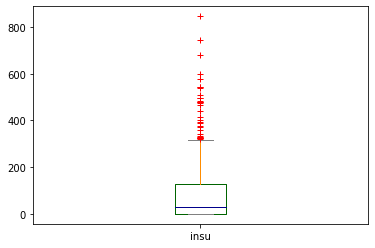

In [14]:
df['insu'].plot(kind='box', color=color, sym='r+')

## **3.** Using Andrews curves
I used andrews curves plotting to visualize data clustering for each class, Curves belonging to samples of the same class will usually be closer together and form larger structures.

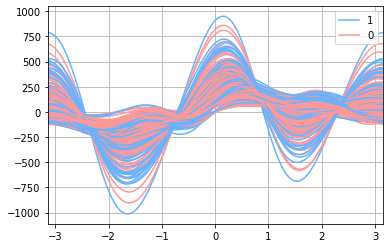

In [16]:
pd.plotting.andrews_curves(df, 'class', color=['#66b3ff','#ff9999'])

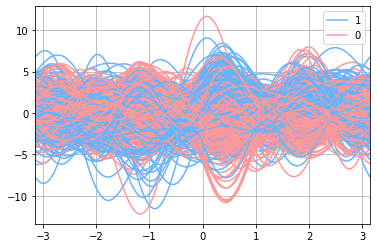

In [18]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf['class']= all_labels
pd.plotting.andrews_curves(ddf, 'class', color=['#66b3ff','#ff9999'])

The curves of two classes are mixed. There is no way to distinguish between them. It is not sufficient to predict the target class using those features.

## **4.** Using Parallel coordinates plotting
I used Parallel coordinates to comparing variables together and seeing the relationships between them.

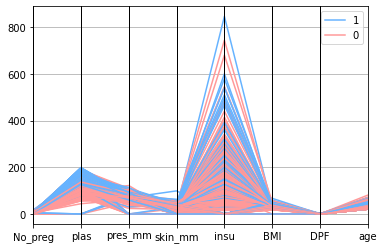

In [19]:
pd.plotting.parallel_coordinates(df, 'class', color=['#66b3ff','#ff9999'])

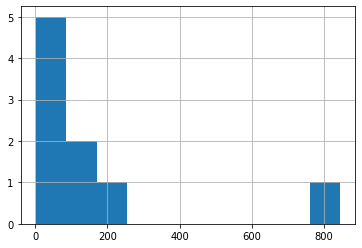

In [20]:
df.describe().T['max'].hist()

The E attribute is confuse the plot so i will drop it.

In [22]:
(df == 0).sum()

No_preg    111
plas         5
pres_mm     35
skin_mm    227
insu       374
BMI         11
DPF          0
age          0
class      500
dtype: int64

The plotting show that features intersect at lots of zero points, it may expresses the missing values filling method. so I will consider it as **NaN values**. 
But the plot is very dense plot so i will use 10 rows.

In [23]:
dfn=df[['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']].loc[1:10]

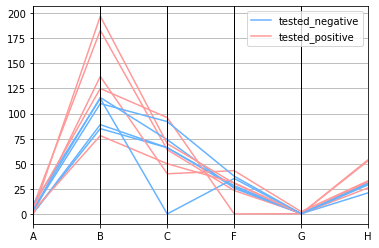

In [ ]:
pd.plotting.parallel_coordinates(dfn, 'class', color=['#66b3ff','#ff9999'])

There is no special fenomena for each class, the ranges is overlapping, we still see zeros points

## **5.** Using Radviz Plot
I used radviz plotting to recognize distinguished cluster for each class

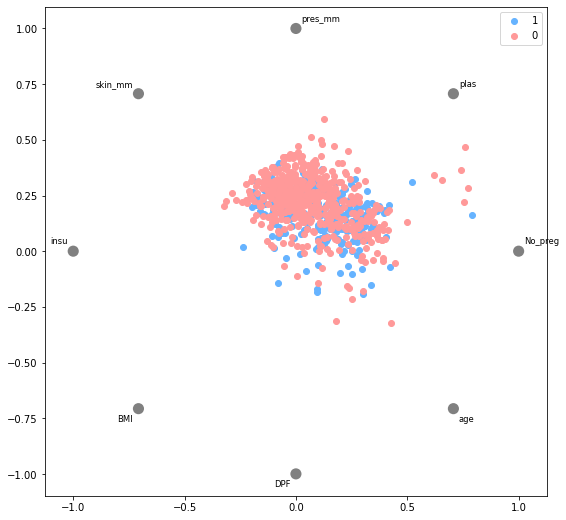

In [24]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf.columns= df.columns[0:-1]
plt.figure(figsize=(9, 9))
ddf['class']= all_labels
pd.plotting.radviz(ddf, 'class', color=['#66b3ff','#ff9999'], )


There is no clear recognize distinguished cluster for each class to attributes as we saw in the previous figures.
We can see a lot of outliers corresponding to the negative tests class.

## **6.** Using hist plot

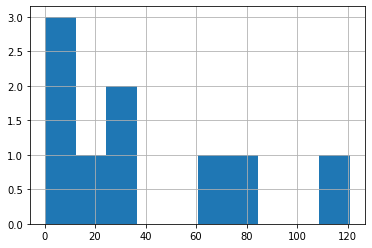

In [25]:
df.describe().T['mean'].hist()

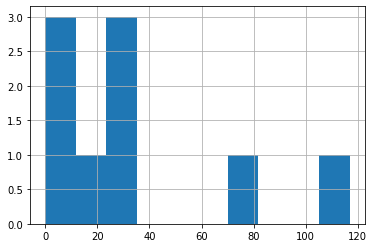

In [ ]:
df.median().hist()

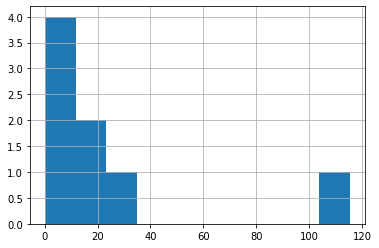

In [ ]:
df.describe().T['std'].hist()

The mode is the most frequent observation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc13f538ef0>,
      dtype=object)

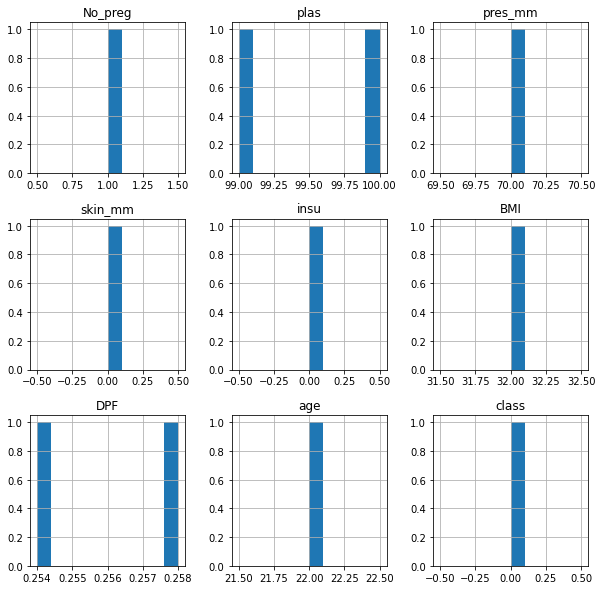

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.mode().hist(ax=ax)

## **7.** Using Violin plot
By using violin plot to shows the distribution of quantitative data across several levels of categorical variables such that those distributions can be compared, and features a kernel density estimation of the underlying distribution we can note a lot of zeros values.

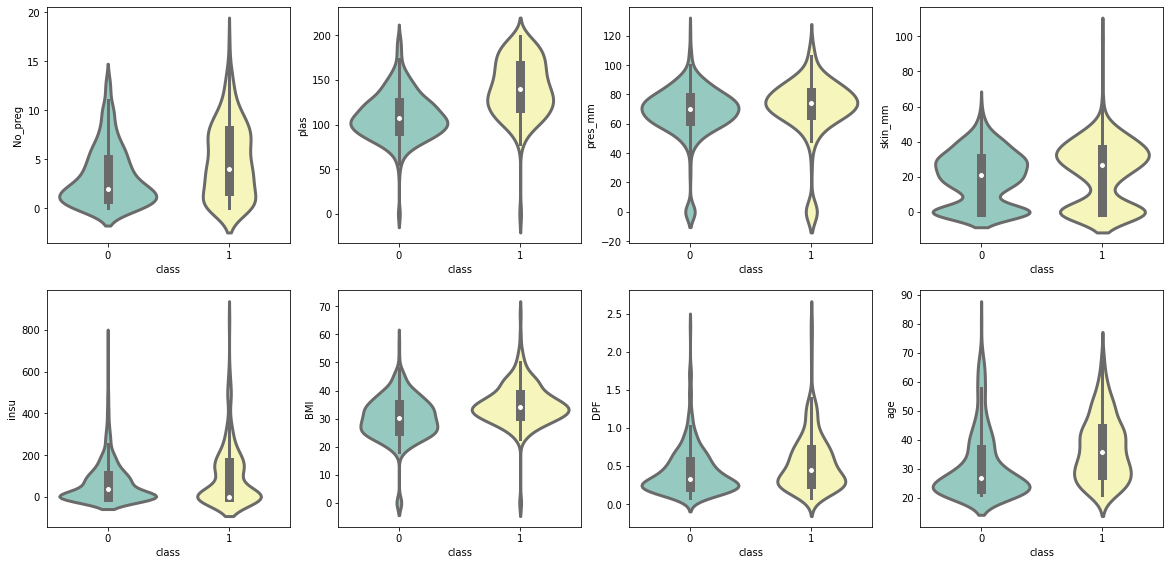

In [ ]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df):
    if column == 'class':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='class', y=column, data=df, inner="box", palette="Set3", cut=2, linewidth=3)

## **8.** Using Pair and KDE _Kernel Density Estimate_ Plot
By using Pair and KDE plot to visualize distribution of single variables and relationships between variables we can notes
1.	Relationships between some attribute,
2.	A lot of zeros also,
3.	Probability distributions are  close and same.


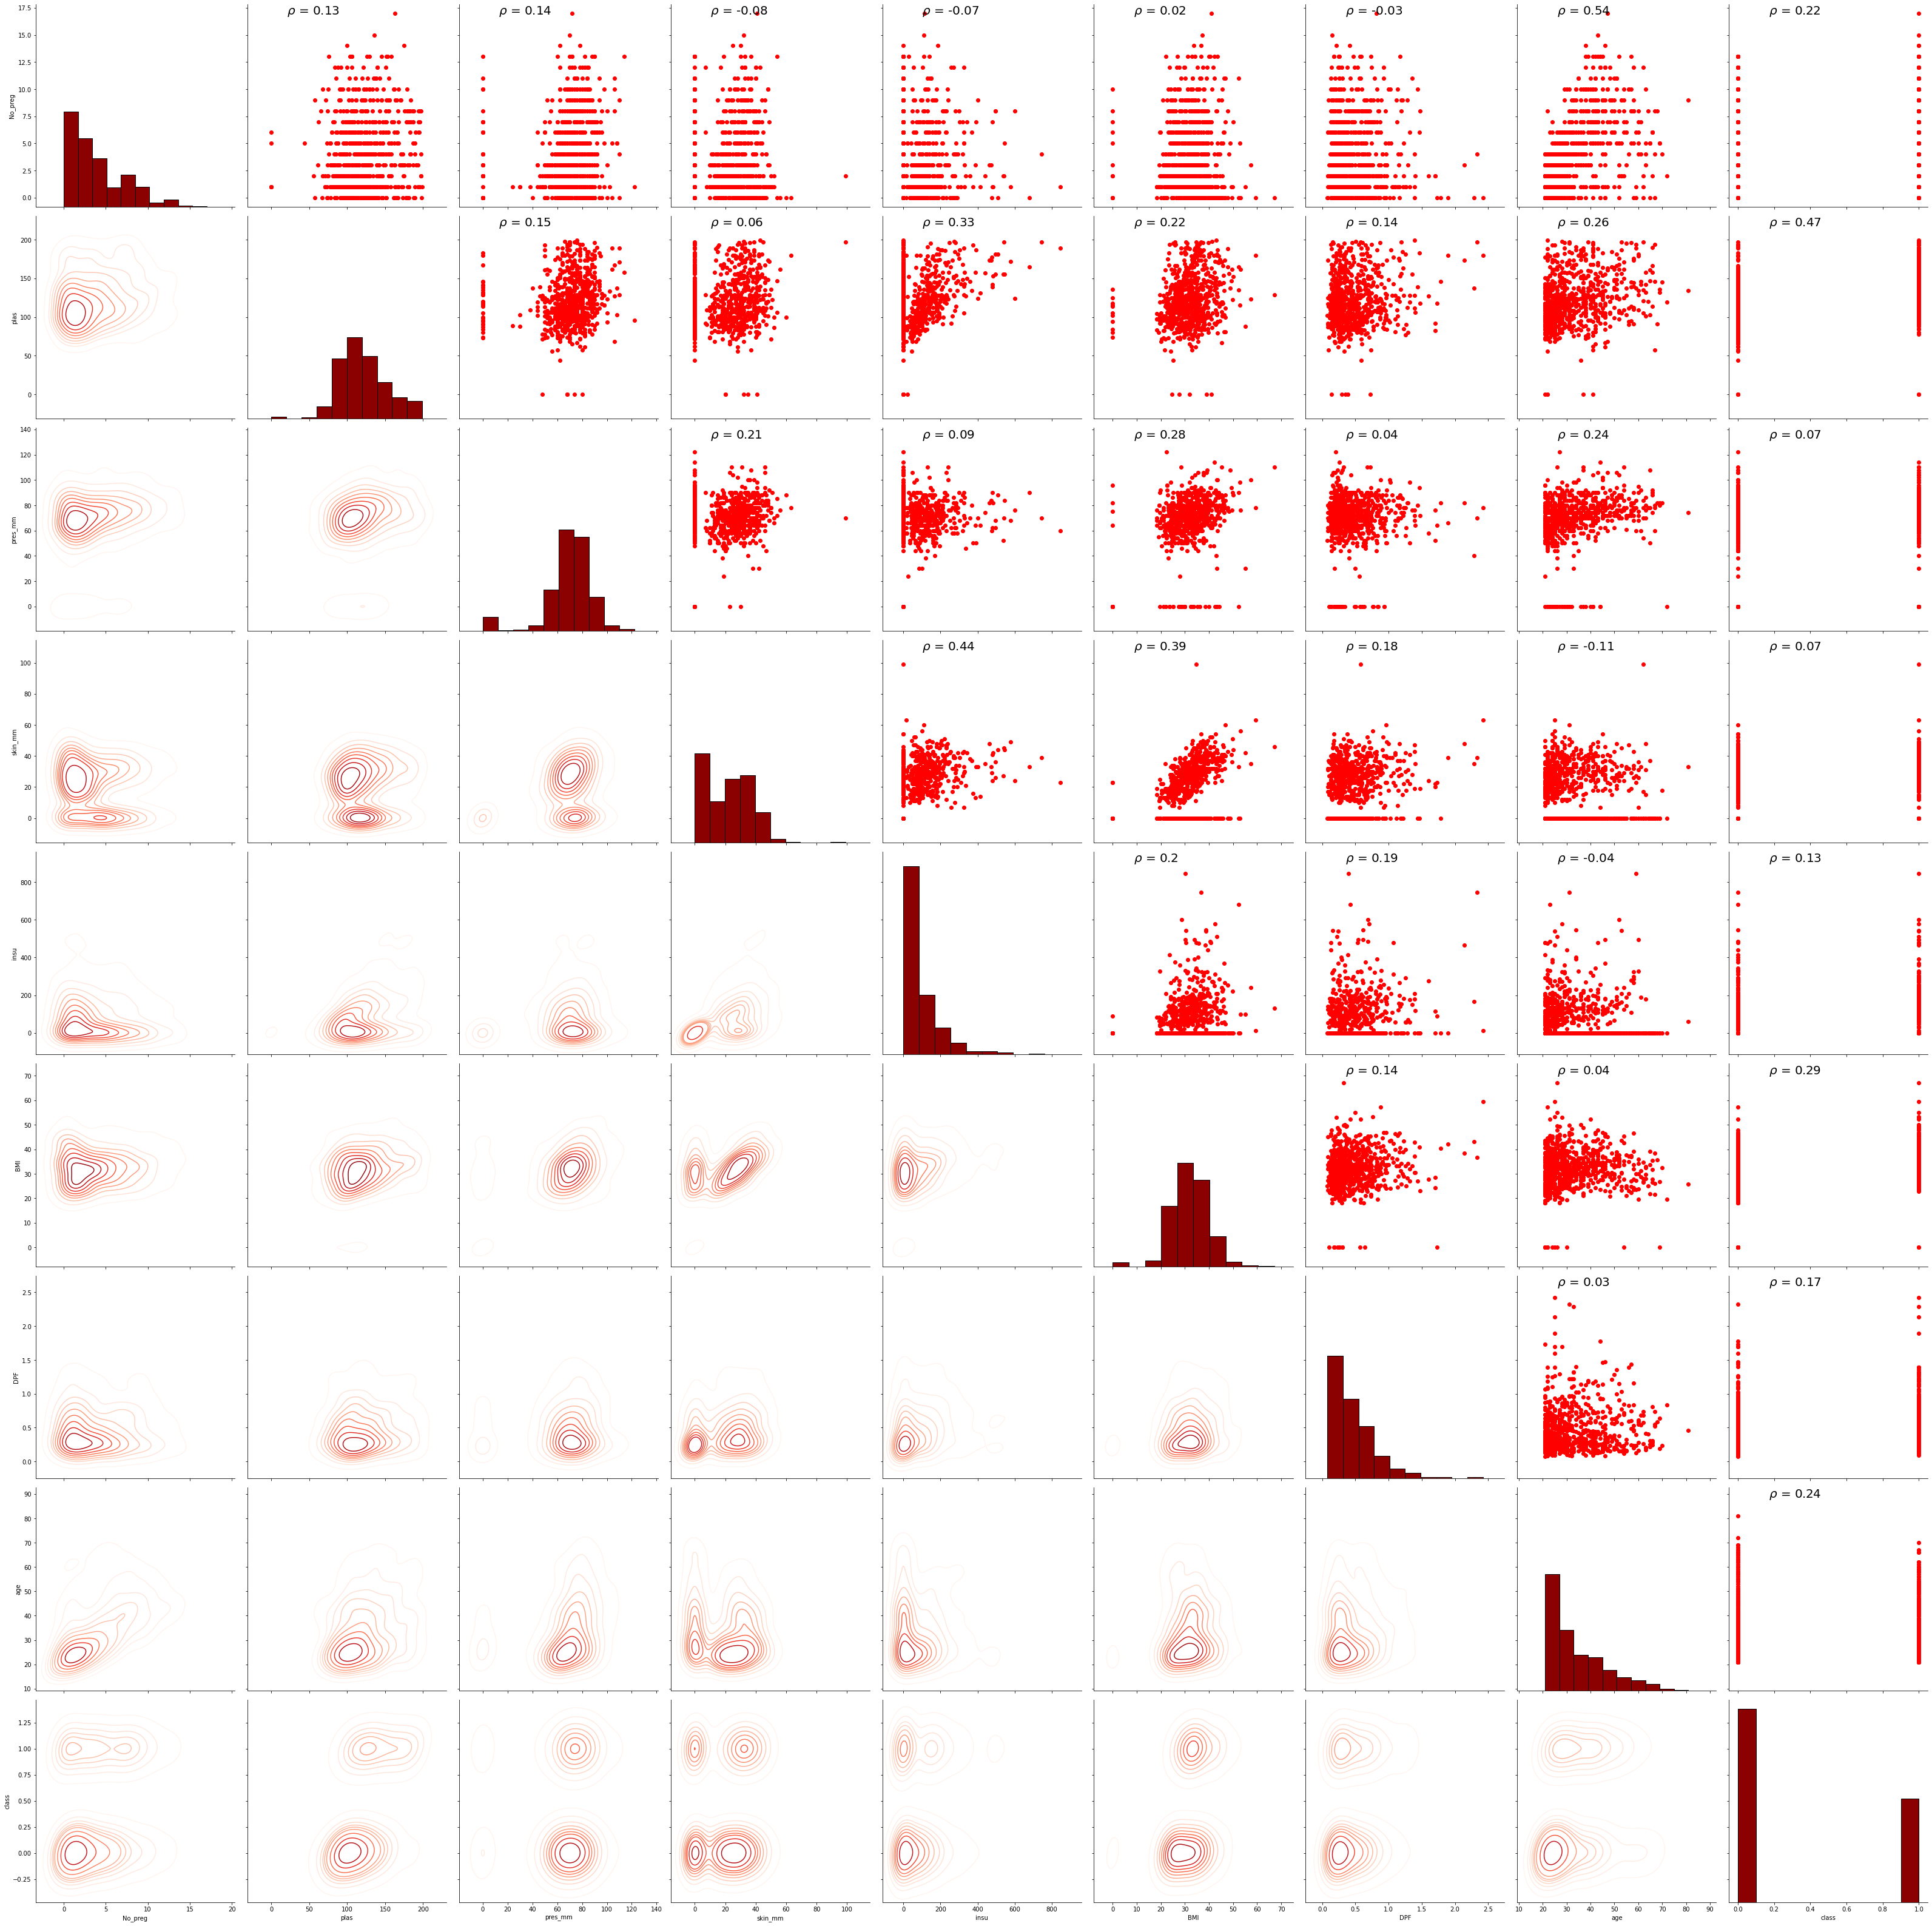

In [ ]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sb.PairGrid(data= df,
                    vars = ['No_preg', 'plas', 'pres_mm', 'skin_mm',
                            'insu', 'BMI', 'DPF', 'age', 'class'], height = 5)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_upper(corr)
grid = grid.map_lower(sb.kdeplot, cmap = 'Reds',)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');


## **9.** Using Heatmap Correlation Matrix

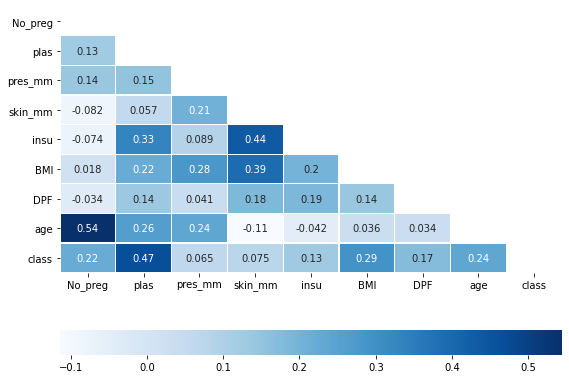

In [ ]:
plt.figure(figsize=(9, 7))
matrix = np.triu(df.corr())
corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True, cmap='Blues', linewidths=0.15,
           mask=matrix, cbar_kws= {'orientation': 'horizontal'})
plt.show()

# Step 3: Tidying the data


# **1.** Fill NaN Methods Comparison

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df

,No_preg,plas,pres_mm,skin_mm,insu,BMI,DPF,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
       'class'],
      dtype='object')

In [ ]:
(df['age']==0).sum()

0

In [ ]:
print('''Columns coud'nt be zero are: ''' , list(df.columns[1:6]))

Columns coud'nt be zero are:  ['plas', 'pres_mm', 'skin_mm', 'insu', 'BMI']


In [26]:
# Redefining zeros into NaN values
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [27]:
df.isnull().sum()

No_preg      0
plas         5
pres_mm     35
skin_mm    227
insu       374
BMI         11
DPF          0
age          0
class        0
dtype: int64

I will compare between 5 technique to fill NaN values

## **1.** Remove Rows With Missing Values

In [28]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

In [29]:
df.dropna(inplace=True)
df.shape

(392, 9)

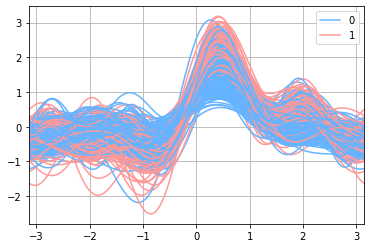

In [30]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf['class']= all_labels
pd.plotting.andrews_curves(ddf, 'class', color=['#66b3ff','#ff9999'])

In [31]:
print('Percentage of dropped data=', (768-392)/768)

Percentage of dropped data= 0.4895833333333333


In [32]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(392, 8)

In [33]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7861904761904762, 0.12857054673418924))
LDA, 0.7897619047619047, 0.12802595931491162))
KNN, 0.7623809523809524, 0.11292744444886092))
CART, 0.6799999999999999, 0.1288673842408871))
NB, 0.7797619047619049, 0.11212111810322156))
SVM, 0.7554761904761904, 0.11571795996518176))
XGB, 0.7816666666666667, 0.11272018010217857))


## **2.** Impute Missing Values (Mean Value Filling)

In [34]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [35]:
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)
df.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [36]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [37]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.7738300492610837, 0.0689196220881071))
LDA, 0.7737684729064039, 0.07106786364748625))
KNN, 0.8173645320197045, 0.07886207573510806))
CART, 0.8745689655172415, 0.06169603517166105))
NB, 0.7720443349753694, 0.0700920699840484))
SVM, 0.8349137931034484, 0.06586019332396725))
XGB, 0.8869458128078817, 0.05642168499262387))


## **3.**  Impute Missing Values (Median Value Filling)


In [38]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [39]:
df1.fillna(df1.median(), inplace=True)
df2.fillna(df2.median(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)
df.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [40]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [41]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.7633004926108373, 0.07843541820685897))
LDA, 0.7703817733990148, 0.07992931047044209))
KNN, 0.8070812807881772, 0.07939031074825631))
CART, 0.8713054187192117, 0.03929034671639484))
NB, 0.7598522167487685, 0.08545857474403694))
SVM, 0.8504926108374384, 0.05873674193644676))
XGB, 0.888793103448276, 0.06942809765514414))


## **4.**  Using back Filling


In [42]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [43]:
df1.fillna(method= 'backfill', inplace=True)
df2.fillna(method= 'backfill', inplace=True)

df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)
df.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [44]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [45]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.7668103448275861, 0.08091636753181289))
LDA, 0.7652709359605911, 0.07755140356317015))
KNN, 0.7690270935960591, 0.0745836590047773))
CART, 0.732820197044335, 0.06737530983386494))
NB, 0.7598522167487685, 0.07873013142757428))
SVM, 0.7686576354679804, 0.08000877623455863))
XGB, 0.7896551724137931, 0.07607369241829157))


## **5.**  Using forward Filling


In [46]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [47]:
df1.fillna(method= 'ffill', inplace=True)
df2.fillna(method= 'ffill', inplace=True)

df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)
df.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [48]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [49]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.7652093596059113, 0.07235394610657282))
LDA, 0.7669334975369458, 0.07328349403480619))
KNN, 0.7568965517241378, 0.0940046500259637))
CART, 0.7223522167487685, 0.0592292517872015))
NB, 0.7461206896551724, 0.06380840654648952))
SVM, 0.7600985221674877, 0.06766521362701008))
XGB, 0.7846059113300492, 0.05681452407049272))


## Classification Comparison of Fill NaN Methods

In [50]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [51]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'XGB']

In [52]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [53]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [54]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [55]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [56]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [57]:
values= ['Acc', 'SD']

In [58]:
Fill_NaN_Methods=['1_Remove', '2_Mean_fill','3_Median_fill',
     '4_Back_fill', '5_Forwd_fill']

In [59]:
idx = pd.MultiIndex.from_product([Fill_NaN_Methods, values],
                                 names=['Fill_NaN_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

Fill_NaN_Methods 1_Remove        2_Mean_fill  ... 4_Back_fill 5_Forwd_fill       
values                Acc     SD         Acc  ...          SD          Acc     SD
LR                  0.786  0.132       0.774  ...       0.083        0.765  0.074
LDA                 0.790  0.131       0.774  ...       0.080        0.767  0.075
KNN                 0.762  0.116       0.817  ...       0.077        0.757  0.096
CART                0.680  0.132       0.875  ...       0.069        0.722  0.061
NB                  0.780  0.115       0.772  ...       0.081        0.746  0.065
SVM                 0.755  0.119       0.835  ...       0.082        0.760  0.069
XGB                 0.782  0.116       0.887  ...       0.078        0.785  0.058

[7 rows x 10 columns]

In [60]:
classification_comparison.to_csv('Classification Comparison of Fill_NaN_Methods.csv', index= False)

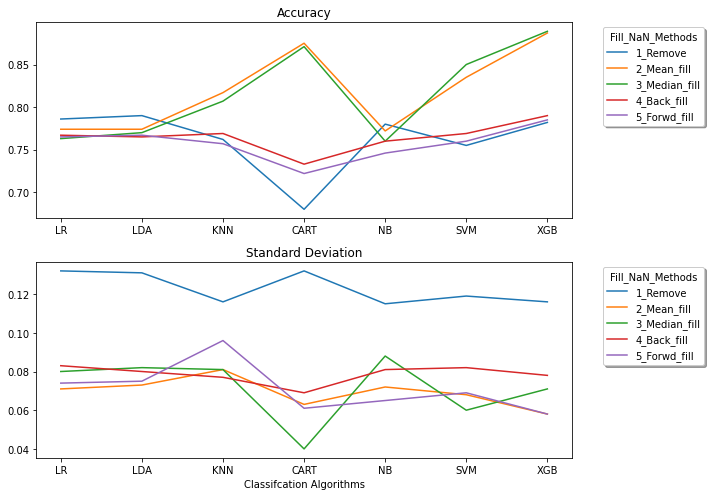

In [68]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='Fill_NaN_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [62]:
#classification_comparison= classification_comparison.drop('1_Remove', axis=1, level=0)

In [63]:
classification_comparison.T.max()

LR      0.786
LDA     0.790
KNN     0.817
CART    0.875
NB      0.780
SVM     0.850
XGB     0.889
dtype: float64

In [64]:
FIll_NaN= classification_comparison.T.max()

In [65]:
classification_comparison.T['CART']

Fill_NaN_Methods  values
1_Remove          Acc       0.680
                  SD        0.132
2_Mean_fill       Acc       0.875
                  SD        0.063
3_Median_fill     Acc       0.871
                  SD        0.040
4_Back_fill       Acc       0.733
                  SD        0.069
5_Forwd_fill      Acc       0.722
                  SD        0.061
Name: CART, dtype: float64

In [66]:
classification_comparison.T['XGB']

Fill_NaN_Methods  values
1_Remove          Acc       0.782
                  SD        0.116
2_Mean_fill       Acc       0.887
                  SD        0.058
3_Median_fill     Acc       0.889
                  SD        0.071
4_Back_fill       Acc       0.790
                  SD        0.078
5_Forwd_fill      Acc       0.785
                  SD        0.058
Name: XGB, dtype: float64

In [67]:
methods_comparison= pd.DataFrame(FIll_NaN, columns=['FIll_NaN'])
methods_comparison

,FIll_NaN
LR,0.786
LDA,0.790
KNN,0.817
CART,0.875
NB,0.780
SVM,0.850
XGB,0.889


## Selected Fill NaN Methods

The most accurate Fill NaN Method is dropping Nan **but** we lost 56 % of data. that is meant 56 % of tests will fail. so it can't be selected.
The best fill NaN method is **Mean_fill**

In [ ]:
df= pd.read_csv('/content/data/pima-indians-diabetes.csv', header= None)
df.columns= ['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age', 'class']
df[df.columns[1:6]]= df[df.columns[1:6]].replace(0, np.nan)

df1 = df.loc[df['class'] == 1]
df2 = df.loc[df['class'] == 0]

In [ ]:
df1.fillna(df1.median(), inplace=True)
df2.fillna(df2.median(), inplace=True)

dataframe = [df1, df2]
df = pd.concat(dataframe)
df.isnull().sum().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.7633004926108373, 0.07843541820685897))
LDA, 0.7703817733990148, 0.07992931047044209))
KNN, 0.8070812807881772, 0.07939031074825631))
CART, 0.8677339901477833, 0.05248010777663595))
NB, 0.7598522167487685, 0.08545857474403694))
SVM, 0.8504926108374384, 0.05873674193644676))
XGB, 0.888793103448276, 0.06942809765514414))


# **2.** Add features

## **1.** Add features based on BMI classification table


**BMI classification table**  
- BMI		CLASSIFICATION
- < 30		:Obese
- 25-30		:Overweight
- 20-25		:Healthy weight range
- 20-18		:Underweight
- <18		  :Very Underweight


In [ ]:
Obese= []
for i in df['BMI']:
  Obese.append(1 if i>30 else 0)
pd.value_counts(Obese)

1    476
0    292
dtype: int64

In [ ]:
df['Obese']= Obese

In [ ]:
Overweight= []
for i in df['BMI']:
  Overweight.append(1 if 30>i>25 else 0)
pd.value_counts(Overweight)

0    595
1    173
dtype: int64

In [ ]:
df['Overweight']= Overweight

In [ ]:
Healthy_weight= []
for i in df['BMI']:
  Healthy_weight.append(1 if 25>i>20 else 0)
pd.value_counts(Healthy_weight)

0    676
1     92
dtype: int64

In [ ]:
df['Healthy_weight']= Healthy_weight

In [ ]:
Underweight= []
for i in df['BMI']:
  Underweight.append(1 if 20>i>18 else 0)
pd.value_counts(Underweight)

0    755
1     13
dtype: int64

In [ ]:
df['Underweight']= Underweight

In [ ]:
Very_Underweight= []
for i in df['BMI']:
  Very_Underweight.append(1 if i<18 else 0)
pd.value_counts(Very_Underweight)

0    768
dtype: int64

In [ ]:
#df['Very_Underweight']= Very_Underweight

## **2.** Add features based on 2-Hour serum insulin


**2-Hour serum insulin classification table**  
- insulin		CLASSIFICATION
- **>**140		:Normal
- 140-199		:pre-diabetic
- < 199		:diabetic

In [ ]:
Normal= []
for i in df['insu']:
  Normal.append(1 if i<140 else 0)
pd.value_counts(Normal)

1    457
0    311
dtype: int64

In [ ]:
df['Normal']= Normal

In [ ]:
pre_diabetic= []
for i in df['insu']:
  pre_diabetic.append(1 if 199>i>140 else 0)
pd.value_counts(pre_diabetic)

0    555
1    213
dtype: int64

In [ ]:
df['pre_diabetic']= pre_diabetic

In [ ]:
diabetic= []
for i in df['insu']:
  diabetic.append(1 if i>199 else 0)
pd.value_counts(diabetic)

0    679
1     89
dtype: int64

In [ ]:
df['diabetic']= diabetic

## **3.** Add features based on Plasma glucose 2-Hour in an oral glucose tolerance test


**2-Hour serum insulin classification table**  
- insulin		CLASSIFICATION
- **>**100		:Normal
- 100-125		:pre_diabetic
- < 125		:diabetic

In [ ]:
Normal_p= []
for i in df['plas']:
  Normal_p.append(1 if i<100 else 0)
pd.value_counts(Normal_p)

0    576
1    192
dtype: int64

In [ ]:
df['Normal_p']= Normal_p

In [ ]:
pre_diabetic_p= []
for i in df['plas']:
  pre_diabetic_p.append(1 if 125>i>100 else 0)
pd.value_counts(pre_diabetic_p)

0    522
1    246
dtype: int64

In [ ]:
df['pre_diabetic_p']= pre_diabetic_p

In [ ]:
diabetic_p= []
for i in df['plas']:
  diabetic_p.append(1 if i>125 else 0)
pd.value_counts(diabetic_p)

0    469
1    299
dtype: int64

In [ ]:
df['diabetic_p']= diabetic_p

In [ ]:
df= df[['No_preg', 'plas', 'pres_mm', 'skin_mm', 'insu', 'BMI', 'DPF', 'age',
        'Obese', 'Overweight', 'Healthy_weight', 'Underweight',
        'Normal', 'pre_diabetic', 'diabetic', 'Normal_p',
       'pre_diabetic_p', 'diabetic_p', 'class']]

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
all_inputs.shape

(768, 18)

In [ ]:
results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7633004926108373, 0.07843541820685897))
LDA, 0.7703817733990148, 0.07992931047044209))
KNN, 0.8070812807881772, 0.07939031074825631))
CART, 0.8677339901477833, 0.05469893820419071))
NB, 0.7598522167487685, 0.08545857474403694))
SVM, 0.8504926108374384, 0.05873674193644676))
XGB, 0.888793103448276, 0.06942809765514414))


## Classification Comparison

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'XGB']

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
Add_F= classification_comparison.T.max()

In [ ]:
methods_comparison['Add_F']= Add_F
methods_comparison

,FIll_NaN,Add_F
LR,0.786,0.763
LDA,0.790,0.770
KNN,0.817,0.807
CART,0.878,0.868
NB,0.780,0.760
SVM,0.850,0.850
XGB,0.889,0.889


# **3.** Automatic Outlier Detection Algorithms Comparison

## **1.** DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']


In [ ]:
outlier_index1=[]
for col in df.columns[0:-1]:
  clusters=remove_outliers_DBSCAN((df[col]), 0.2 , 2)
  df_cluster=pd.DataFrame(clusters)
  outlier_index1= outlier_index1+(list(df_cluster.index[df_cluster['cluster']==-1]))
outlier_index1=list(set(outlier_index1))
print(len(outlier_index1))

DBSCAN_df=df.drop(outlier_index1)
#DBSCAN_df.to_csv('DBSCAN_df.csv', index= False)
#!mkdir Outlier_Detection_DFs
#!mv DBSCAN_df.csv Outlier_Detection_DFs/

all_inputs = DBSCAN_df[DBSCAN_df.columns[0:-1]].values
all_labels = DBSCAN_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

136
LR, 0.8945652173913045, 0.05868167215871575))
LDA, 0.9009963768115943, 0.06960689751892135))
KNN, 0.9053442028985508, 0.06461292693522834))
CART, 0.8483695652173913, 0.0608412524733053))
NB, 0.6959239130434783, 0.09377738870386135))
SVM, 0.8904891304347824, 0.06929075489580602))
XGB, 0.9031702898550724, 0.06065858828392065))


## **2.** Isolation Forest

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto',
                    contamination=0.05, 
                        max_features=1.0 , bootstrap=False, n_jobs=-1,
                     random_state=42, verbose=0 )
clf.fit(df[to_model_columns])
pred = clf.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index2=list(outliers.index)
print(outlier_index2)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Isolation_Forest_df=df.drop(outlier_index2)
Isolation_Forest_df['class'].value_counts()
#Isolation_Forest_df.to_csv('Isolation_Forest_df.csv', index= False)
#!mv Isolation_Forest_df.csv Outlier_Detection_DFs/
all_inputs = Isolation_Forest_df[Isolation_Forest_df.columns[0:-1]].values
all_labels = Isolation_Forest_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

[8, 13, 39, 93, 99, 218, 243, 254, 319, 323, 370, 408, 445, 498, 510, 584, 646, 749, 33, 35, 50, 228, 258, 279, 307, 316, 330, 382, 392, 395, 453, 511, 519, 537, 609, 657, 673, 679, 713]
 1    729
-1     39
Name: anomaly, dtype: int64
LR, 0.8513227513227513, 0.05717346818737394))
LDA, 0.8624338624338623, 0.05360163104466205))
KNN, 0.8386243386243386, 0.04778410547139799))
CART, 0.8316798941798942, 0.07878855303542))
NB, 0.65734126984127, 0.11358920482862235))
SVM, 0.8605820105820104, 0.0559812988926192))
XGB, 0.8936507936507935, 0.04623654496390321))


## **3.** Minimum Covariance Determinant

In [ ]:
to_model_columns=df.columns[:-1]
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.2)
ee.fit(df[to_model_columns])
pred = ee.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index3=list(outliers.index)
print(outlier_index3)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Minimum_Covariance_Determinant_df=df.drop(outlier_index3)
Minimum_Covariance_Determinant_df['class'].value_counts()
#Minimum_Covariance_Determinant_df.to_csv('Minimum_Covariance_Determinant_df.csv', index= False)
#!mv Minimum_Covariance_Determinant_df.csv Outlier_Detection_DFs/
all_inputs = Minimum_Covariance_Determinant_df[Minimum_Covariance_Determinant_df.columns[0:-1]].values
all_labels = Minimum_Covariance_Determinant_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

[4, 8, 9, 13, 15, 16, 25, 31, 39, 43, 45, 53, 56, 70, 99, 111, 120, 125, 129, 132, 159, 177, 186, 187, 193, 199, 206, 215, 220, 231, 245, 254, 287, 296, 298, 303, 319, 323, 356, 359, 360, 370, 375, 388, 408, 409, 415, 425, 445, 458, 480, 485, 493, 498, 540, 545, 546, 560, 561, 579, 584, 606, 612, 655, 661, 662, 666, 683, 695, 701, 715, 753, 12, 18, 20, 54, 57, 58, 73, 87, 95, 102, 106, 135, 136, 139, 144, 150, 153, 162, 163, 217, 224, 228, 247, 248, 258, 263, 275, 279, 286, 294, 297, 320, 330, 335, 364, 371, 384, 389, 390, 392, 395, 412, 446, 452, 453, 454, 456, 459, 464, 486, 487, 489, 511, 517, 519, 524, 537, 538, 549, 555, 574, 583, 593, 594, 596, 597, 608, 617, 621, 622, 626, 639, 645, 657, 673, 679, 684, 707, 710, 711, 713, 745]
 1    614
-1    154
Name: anomaly, dtype: int64
LR, 0.8891304347826088, 0.05580651153475407))
LDA, 0.8934782608695653, 0.05747523507131429))
KNN, 0.8760869565217393, 0.061908829851731045))
CART, 0.8804347826086957, 0.06281818815999951))
NB, 0.7391304347826

## **4.** Local Outlier Factor

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True, n_jobs=1,
                         n_neighbors=50, contamination=0.2)
lof.fit(df[to_model_columns])
pred = lof.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index4=list(outliers.index)
print(outlier_index4)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
Local_Outlier_Factor_df=df.drop(outlier_index4)
Local_Outlier_Factor_df['class'].value_counts()
#Local_Outlier_Factor_df.to_csv('Local_Outlier_Factor_df.csv', index= False)
#!mv Local_Outlier_Factor_df.csv Outlier_Detection_DFs/
all_inputs = Local_Outlier_Factor_df[Local_Outlier_Factor_df.columns[0:-1]].values
all_labels = Local_Outlier_Factor_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

[4, 8, 13, 16, 39, 43, 99, 111, 120, 125, 132, 177, 186, 187, 195, 206, 216, 220, 231, 254, 287, 293, 296, 323, 328, 359, 360, 369, 370, 409, 415, 424, 425, 445, 458, 506, 540, 545, 546, 561, 579, 584, 655, 662, 666, 691, 695, 715, 732, 753, 18, 20, 27, 40, 50, 54, 55, 57, 62, 76, 80, 85, 86, 94, 95, 97, 102, 106, 139, 146, 150, 153, 157, 169, 211, 212, 223, 228, 247, 248, 258, 260, 279, 286, 294, 297, 313, 320, 327, 346, 352, 362, 379, 392, 393, 396, 413, 422, 452, 453, 456, 459, 478, 483, 486, 487, 489, 495, 500, 511, 519, 537, 538, 548, 549, 555, 567, 573, 575, 576, 591, 594, 596, 597, 599, 617, 622, 645, 652, 654, 657, 665, 672, 673, 674, 679, 707, 710, 711, 717, 728, 737, 751, 763]
 1    624
-1    144
Name: anomaly, dtype: int64
LR, 0.9053442028985508, 0.07726799693023904))
LDA, 0.9096920289855073, 0.06874582294312656))
KNN, 0.8924818840579712, 0.06839403943952178))
CART, 0.880072463768116, 0.06066433656382338))
NB, 0.7091485507246377, 0.11213822990430226))
SVM, 0.9075181159420292

## **5.** One-Class SVM

In [ ]:
to_model_columns=df.columns[0:-1]
from sklearn.svm import OneClassSVM

ocs = OneClassSVM(nu=0.05)
ocs.fit(df[to_model_columns])
pred = ocs.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index5=list(outliers.index)
print(outlier_index5)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())
df.drop('anomaly', axis='columns', inplace=True)
One_Class_SVM_df=df.drop(outlier_index5)
One_Class_SVM_df['class'].value_counts()

#One_Class_SVM_df.to_csv('One_Class_SVM_df.csv', index= False)
#!mv One_Class_SVM_df.csv Outlier_Detection_DFs/

all_inputs = One_Class_SVM_df[One_Class_SVM_df.columns[0:-1]].values
all_labels = One_Class_SVM_df['class'].values
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

[8, 13, 43, 111, 186, 206, 220, 254, 323, 359, 409, 445, 561, 579, 584, 655, 661, 695, 753, 62, 108, 139, 228, 247, 258, 279, 286, 466, 486, 489, 519, 549, 566, 597, 617, 672, 679, 680, 707, 760]
 1    728
-1     40
Name: anomaly, dtype: int64
LR, 0.8479497354497356, 0.06706293765359474))
LDA, 0.8532407407407406, 0.0693637412141538))
KNN, 0.831415343915344, 0.05385965802714119))
CART, 0.837037037037037, 0.07800487846872012))
NB, 0.641005291005291, 0.1146615598734695))
SVM, 0.8551587301587302, 0.07620643479987421))
XGB, 0.8809523809523808, 0.05183598990728605))


## Comparison 

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_1']= df_mean
classification_comparison['sd_1']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 3) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 3) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
classification_comparison

,Accuracy_1,sd_1,Accuracy_2,sd_2,Accuracy_3,sd_3,Accuracy_4,sd_4,Accuracy_5,sd_5
LR,0.895,0.060,0.851,0.059,0.889,0.057,0.905,0.079,0.848,0.069
LDA,0.901,0.071,0.862,0.055,0.893,0.059,0.910,0.071,0.853,0.071
KNN,0.905,0.066,0.839,0.049,0.876,0.064,0.892,0.070,0.831,0.055
CART,0.848,0.062,0.832,0.081,0.880,0.064,0.880,0.062,0.837,0.080
NB,0.696,0.096,0.657,0.117,0.739,0.106,0.709,0.115,0.641,0.118
SVM,0.890,0.071,0.861,0.057,0.883,0.060,0.908,0.070,0.855,0.078
XGB,0.903,0.062,0.894,0.047,0.904,0.067,0.920,0.065,0.881,0.053


In [ ]:
values= ['Acc', 'SD']

In [ ]:
DFs=[ '1_DBSCAN_df', '2_IF_df', '3_MCD_df', '4_LOF_df','5_OCSVM_df']

In [ ]:
idx = pd.MultiIndex.from_product([DFs, values],
                                 names=['DFs', 'values'])

classification_comparison.columns = idx
classification_comparison

DFs    1_DBSCAN_df        2_IF_df         ... 4_LOF_df        5_OCSVM_df       
values         Acc     SD     Acc     SD  ...      Acc     SD        Acc     SD
LR           0.895  0.060   0.851  0.059  ...    0.905  0.079      0.848  0.069
LDA          0.901  0.071   0.862  0.055  ...    0.910  0.071      0.853  0.071
KNN          0.905  0.066   0.839  0.049  ...    0.892  0.070      0.831  0.055
CART         0.848  0.062   0.832  0.081  ...    0.880  0.062      0.837  0.080
NB           0.696  0.096   0.657  0.117  ...    0.709  0.115      0.641  0.118
SVM          0.890  0.071   0.861  0.057  ...    0.908  0.070      0.855  0.078
XGB          0.903  0.062   0.894  0.047  ...    0.920  0.065      0.881  0.053

[7 rows x 10 columns]

In [ ]:
#classification_comparison.to_csv('classification_comparison.csv', index= False)

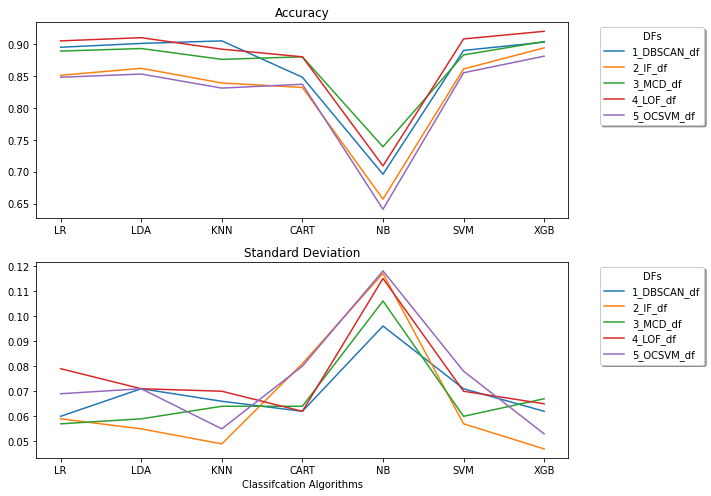

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='DFs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.905
LDA     0.910
KNN     0.905
CART    0.880
NB      0.739
SVM     0.908
XGB     0.920
dtype: float64

In [ ]:
classification_comparison.T['CART']

DFs          values
1_DBSCAN_df  Acc       0.848
             SD        0.062
2_IF_df      Acc       0.832
             SD        0.081
3_MCD_df     Acc       0.880
             SD        0.064
4_LOF_df     Acc       0.880
             SD        0.062
5_OCSVM_df   Acc       0.837
             SD        0.080
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['XGB']

DFs          values
1_DBSCAN_df  Acc       0.903
             SD        0.062
2_IF_df      Acc       0.894
             SD        0.047
3_MCD_df     Acc       0.904
             SD        0.067
4_LOF_df     Acc       0.920
             SD        0.065
5_OCSVM_df   Acc       0.881
             SD        0.053
Name: XGB, dtype: float64

In [ ]:
Outlier=classification_comparison.T.max()

In [ ]:
methods_comparison['Outlier']= Outlier
methods_comparison

,FIll_NaN,Add_F,Outlier
LR,0.786,0.763,0.905
LDA,0.790,0.770,0.910
KNN,0.817,0.807,0.905
CART,0.878,0.868,0.880
NB,0.780,0.760,0.739
SVM,0.850,0.850,0.908
XGB,0.889,0.889,0.920


## Selected Outlier Algorithm DF  

In [ ]:
df= Local_Outlier_Factor_df

In [ ]:
df['class'].value_counts()

0    406
1    218
Name: class, dtype: int64

# **4.** Feature Selection Methods Comparison

## **1.** Removing features with low variance

**VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.*italicised text*

In [ ]:
df.var().nlargest(19)

insu              2625.400337
plas               787.673846
age                120.399368
pres_mm            111.077106
skin_mm             56.022716
BMI                 40.076842
No_preg             11.365343
Obese                0.239196
Normal               0.236315
diabetic_p           0.228153
class                0.227672
pre_diabetic_p       0.223111
pre_diabetic         0.221499
Normal_p             0.197061
Overweight           0.182893
Healthy_weight       0.103467
DPF                  0.094859
diabetic             0.039995
Underweight          0.015794
dtype: float64

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
print(all_inputs.shape)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.09)
all_inputs = sel.fit_transform(all_inputs)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

(624, 18)
(624, 16)
LR, 0.8932065217391306, 0.06668900017766419))
LDA, 0.8846920289855073, 0.07180926112049692))
KNN, 0.8524456521739131, 0.0774283818356977))
CART, 0.8374094202898551, 0.08881593469487098))
NB, 0.8485507246376811, 0.099129799133482))
SVM, 0.8825181159420289, 0.07013297476838891))
XGB, 0.888858695652174, 0.0722262297835493))


Univariate Feature Selection

## **2.** UFS SelectKBest Select K Best
it removes all but the highest scoring features

In [ ]:
all_inputs = df[df.columns[0:-1]].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

all_inputs = SelectKBest(chi2, k=13).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

(624, 18)
(624, 13)
LR, 0.8911231884057973, 0.06865655227079384))
LDA, 0.8803442028985508, 0.06890842147212094))
KNN, 0.882336956521739, 0.06403537077139372))
CART, 0.85643115942029, 0.0784858945361956))
NB, 0.6625, 0.09096494168313926))
SVM, 0.8759057971014492, 0.0709106661144011))
XGB, 0.901358695652174, 0.07395981709508549))


## **3.** `UFS `SelectFpr` False Positive Rate test.
Filter: Select the p values below alpha based on a FPR test. a smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis. For a true null hypothesis, p can take on any value between 0 and 1 with equal likeliness. For a true alternative hypothesis, p-values likely fall closer to 0.

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
from sklearn.feature_selection import SelectFpr, chi2
all_inputs = SelectFpr(chi2, alpha= 0.05
                       ).fit_transform(all_inputs, all_labels)
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

(624, 14)
LR, 0.8869565217391304, 0.07315431836410008))
LDA, 0.8803442028985508, 0.06890842147212094))
KNN, 0.8694746376811594, 0.06359824572563524))
CART, 0.8629528985507247, 0.07696882620525279))
NB, 0.6625, 0.09096494168313926))
SVM, 0.8759057971014492, 0.0709106661144011))
XGB, 0.9035326086956523, 0.07480123797213126))


## **4.** Feature selection using SelectFromModel
### L1-based feature selection
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=.013, penalty="l1", dual=False).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True)
all_inputs = model.transform(all_inputs)
print(all_inputs.shape)

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

(624, 10)
LR, 0.8845108695652175, 0.07073080676275233))
LDA, 0.8803442028985508, 0.07258928215041661))
KNN, 0.8782608695652174, 0.07949286922164056))
CART, 0.8566123188405799, 0.08600260859197865))
NB, 0.8697463768115942, 0.07717455092612477))
SVM, 0.8802536231884057, 0.07139359215679093))
XGB, 0.8908514492753623, 0.06592280287884829))


## **5.** Sequential Feature Selection 
(Selecting features based on importance)
The features with the highest absolute coef_ value are considered the most important. 

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
all_inputs.shape

(624, 18)

Feature importance from coefficients

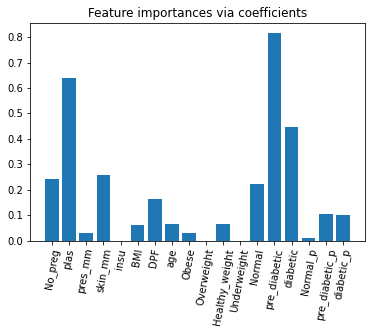

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)

lasso = LassoCV().fit(all_inputs, all_labels)
importance = np.abs(lasso.coef_)
feature_names = np.array(all_labels)
plt.bar(height=importance, x=df.columns[0:-1])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
np.sort(importance)

array([0.00000000e+00, 0.00000000e+00, 7.05008274e-05, 1.07096944e-02,
       2.94237960e-02, 3.07808032e-02, 6.01202616e-02, 6.46328229e-02,
       6.57482279e-02, 1.02084554e-01, 1.03103060e-01, 1.62052892e-01,
       2.22286696e-01, 2.40754154e-01, 2.56322676e-01, 4.46117116e-01,
       6.37956683e-01, 8.14049979e-01])

In [ ]:
importance = [i for i in importance if i != 0]
len(importance)

16

In [ ]:
all_inputs = df[df.columns[0:-1]].values
sc = MinMaxScaler()
all_inputs = sc.fit_transform(all_inputs)
all_labels = df['class'].values
print(all_inputs.shape)

importance = np.abs(lasso.coef_)

from sklearn.feature_selection import SelectFromModel

threshold =  6.46328229e-02

sfm = SelectFromModel(lasso, threshold=threshold).fit(all_inputs, all_labels)
selected_Features = df.columns[:-1][sfm.get_support()]
print("Features selected by SelectFromModel: ",
      f"{df.columns[0:-1][sfm.get_support()]}")


all_inputs = df[selected_Features].values
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

(624, 18)
Features selected by SelectFromModel:  Index(['No_preg', 'plas', 'skin_mm', 'DPF', 'age', 'Normal', 'pre_diabetic',
       'diabetic', 'pre_diabetic_p', 'diabetic_p'],
      dtype='object')
(624, 10)
LR, 0.888858695652174, 0.062396929820117644))
LDA, 0.8825181159420291, 0.07035256755293047))
KNN, 0.8826992753623187, 0.06863258767868498))
CART, 0.8075181159420289, 0.07618798287810655))
NB, 0.8697463768115943, 0.0734084706295972))
SVM, 0.8675724637681158, 0.07683573075795538))
XGB, 0.888858695652174, 0.05980806166546976))


##  **6.** Principal Component Analysis

In [ ]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df['class'].values
print(all_inputs.shape)
from sklearn.decomposition import PCA

pca = PCA(n_components= 8)
pca.fit(all_inputs)
all_inputs = pca.transform(all_inputs)
print(all_inputs.shape)

(624, 18)
(624, 8)


In [ ]:
print(pca.explained_variance_)

[2.95982845e+03 4.86826334e+02 1.43925592e+02 7.67471542e+01
 5.83363726e+01 1.97949030e+01 7.27996423e+00 3.16488403e-01]


In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []
names = []
seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.8573369565217392, 0.07320247344712862))
LDA, 0.8383152173913043, 0.08117251083287268))
KNN, 0.8355978260869564, 0.09010905804312834))
CART, 0.8141304347826086, 0.08161508343529636))
NB, 0.8183876811594203, 0.09710360389941326))
SVM, 0.8715579710144927, 0.08206721691904534))
XGB, 0.8653985507246379, 0.06286284091166913))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_RFLVar', '2_UFSKBest','3_UFSFpr',
     '4_FSU', '5_SFS', '6_PCA']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_RFLVar         2_UFSKBest          ...   5_SFS           6_PCA        
values          Acc      SD        Acc      SD  ...     Acc      SD     Acc      SD
LR           0.8932  0.0684     0.8911  0.0704  ...  0.8889  0.0640  0.8573  0.0751
LDA          0.8847  0.0737     0.8803  0.0707  ...  0.8825  0.0722  0.8383  0.0833
KNN          0.8524  0.0794     0.8823  0.0657  ...  0.8827  0.0704  0.8356  0.0924
CART         0.8374  0.0911     0.8564  0.0805  ...  0.8075  0.0782  0.8141  0.0837
NB           0.8486  0.1017     0.6625  0.0933  ...  0.8697  0.0753  0.8184  0.0996
SVM          0.8825  0.0720     0.8759  0.0728  ...  0.8676  0.0788  0.8716  0.0842
XGB          0.8889  0.0741     0.9014  0.0759  ...  0.8889  0.0614  0.8654  0.0645

[7 rows x 12 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

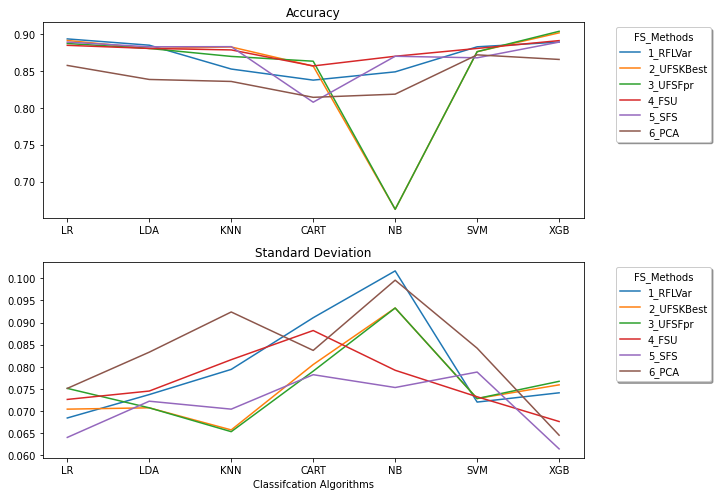

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.8932
LDA     0.8847
KNN     0.8827
CART    0.8630
NB      0.8697
SVM     0.8825
XGB     0.9035
dtype: float64

In [ ]:
Feature =classification_comparison.T.max()

In [ ]:
classification_comparison.T['XGB']

FS_Methods  values
1_RFLVar    Acc       0.8889
            SD        0.0741
2_UFSKBest  Acc       0.9014
            SD        0.0759
3_UFSFpr    Acc       0.9035
            SD        0.0767
4_FSU       Acc       0.8909
            SD        0.0676
5_SFS       Acc       0.8889
            SD        0.0614
6_PCA       Acc       0.8654
            SD        0.0645
Name: XGB, dtype: float64

In [ ]:
classification_comparison.T['CART']

FS_Methods  values
1_RFLVar    Acc       0.8374
            SD        0.0911
2_UFSKBest  Acc       0.8564
            SD        0.0805
3_UFSFpr    Acc       0.8630
            SD        0.0790
4_FSU       Acc       0.8566
            SD        0.0882
5_SFS       Acc       0.8075
            SD        0.0782
6_PCA       Acc       0.8141
            SD        0.0837
Name: CART, dtype: float64

In [ ]:
methods_comparison['Feature']= Feature
methods_comparison

,FIll_NaN,Add_F,Outlier,Feature
LR,0.786,0.763,0.905,0.8932
LDA,0.790,0.770,0.910,0.8847
KNN,0.817,0.807,0.905,0.8827
CART,0.878,0.868,0.880,0.8630
NB,0.780,0.760,0.739,0.8697
SVM,0.850,0.850,0.908,0.8825
XGB,0.889,0.889,0.920,0.9035


The max accuracy was by using Sequential Feature Selection

##  Selected Feature

In [ ]:
df=df[(list(selected_Features) + ['class'])]
df['class'].value_counts()

0    428
1    227
Name: class, dtype: int64

In [ ]:
df.to_csv('New_df.csv', index= False)

In [ ]:
!mv New_df.csv data/

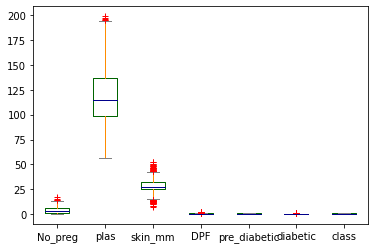

In [ ]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot(kind='box', color=color, sym='r+')

# **5.** Imbalanced Correction Methods

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    406
1    218
Name: class, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(all_labels), all_labels)
print(class_weights)

[0.76847291 1.43119266]


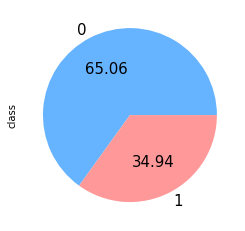

In [ ]:
pd.value_counts(df['class']).plot(kind='pie', autopct='%.2f',fontsize=15, colors= ['#66b3ff','#ff9999'])

## **1.** SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    406
1    218
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    406
0    406
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_1 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.8852150537634408, 0.0513060716110678))
LDA, 0.8902150537634409, 0.06059204186241214))
KNN, 0.8654838709677419, 0.05973880403940755))
CART, 0.891720430107527, 0.055750484708792875))
NB, 0.7728494623655914, 0.09176389382270128))
SVM, 0.885268817204301, 0.056226484016999166))
XGB, 0.9196236559139785, 0.04217449807245265))


## **2.** Border line SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(df['class'])

0    406
1    218
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    406
0    406
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_2 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.8423118279569893, 0.06921530934185517))
LDA, 0.8488172043010753, 0.06401634373346961))
KNN, 0.876774193548387, 0.06262773973450193))
CART, 0.8966129032258063, 0.039080178824081484))
NB, 0.7254838709677419, 0.08834372218831803))
SVM, 0.8701075268817204, 0.07424075169760701))
XGB, 0.9261290322580644, 0.04759579978573331))


## **3.** SVM SMOTE

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    406
1    218
dtype: int64

In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1    406
0    406
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_3 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.8670430107526883, 0.07216029211500136))
LDA, 0.8653225806451612, 0.06423943803823433))
KNN, 0.8900537634408602, 0.06514911256376402))
CART, 0.8901075268817203, 0.0516617152696656))
NB, 0.6811827956989246, 0.09065766058798302))
SVM, 0.8882795698924731, 0.05784296641787106))
XGB, 0.931021505376344, 0.04749874489460335))


## **4.** Adaptive Synthetic Sampling (ADASYN)

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    406
1    218
dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=42)
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    426
0    406
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_4 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.831703629032258, 0.048678635956266224))
LDA, 0.8220262096774194, 0.06396761138387885))
KNN, 0.8656249999999999, 0.05461170327049961))
CART, 0.8751512096774194, 0.047061905167785016))
NB, 0.657157258064516, 0.06958048030492531))
SVM, 0.870110887096774, 0.06156978397830397))
XGB, 0.929385080645161, 0.047294746365599855))


## **5.** Random Over Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    406
1    218
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    406
0    406
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.8817741935483872, 0.05825087080541841))
LDA, 0.8834408602150537, 0.05951435631787974))
KNN, 0.8703225806451613, 0.05333311654482474))
CART, 0.8980107526881719, 0.044488427046331595))
NB, 0.751774193548387, 0.09171562404683249))
SVM, 0.8868817204301076, 0.056193058691165705))
XGB, 0.9309139784946237, 0.040386150606709734))


## **6.** Random Under Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    406
1    218
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
all_inputs, all_labels = undersample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    218
0    218
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.8450367647058824, 0.09630861890657576))
LDA, 0.8540441176470589, 0.08226672877068687))
KNN, 0.8295955882352942, 0.09433765502320277))
CART, 0.8205882352941177, 0.09399549748106448))
NB, 0.7220588235294118, 0.07892347153959707))
SVM, 0.8448529411764707, 0.08888851343154075))
XGB, 0.8691176470588236, 0.07725313679928293))


## **7.** Combining Random Oversampling and Undersampling

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
pd.value_counts(all_labels)

0    406
1    218
dtype: int64

In [ ]:
under = RandomUnderSampler(sampling_strategy=.7)
all_inputs, all_labels = under.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    311
1    218
dtype: int64

In [ ]:
over = RandomOverSampler()
all_inputs, all_labels = over.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    311
0    311
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify= all_labels  )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_7 = []; names = []; seed=42
for name, model in models:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_7 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_7.append(cv_results_7)
    names.append(name)
    print(f"{name}, {cv_results_7.mean()}, {cv_results_7.std()}))")

LR, 0.8995471014492755, 0.07497127810673752))
LDA, 0.8972826086956521, 0.05696621271318875))
KNN, 0.8996376811594203, 0.07039949241167189))
CART, 0.925, 0.04801032257029658))
NB, 0.7794384057971013, 0.10080162544937812))
SVM, 0.9015398550724638, 0.06446393214890897))
XGB, 0.9336050724637681, 0.03679041867126742))


## Classification Comparison of Feature Selection Methods

In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [ ]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [ ]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [ ]:
dfresults = pd.DataFrame(results_7)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_7']= df_mean
classification_comparison['sd_7']= df_sd

In [ ]:
values= ['Acc', 'SD']

In [ ]:
FS_Methods=['1_SMOTE', '2_BL-SMOTE','3_SVM-SMOTE',
     '4_ADASYN', '5_ROS', '6_RUS', '7_CR(O-U)S']

In [ ]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_SMOTE         2_BL-SMOTE  ...   6_RUS 7_CR(O-U)S        
values         Acc      SD        Acc  ...      SD        Acc      SD
LR          0.8852  0.0526     0.8423  ...  0.0988     0.8995  0.0769
LDA         0.8902  0.0622     0.8488  ...  0.0844     0.8973  0.0584
KNN         0.8655  0.0613     0.8768  ...  0.0968     0.8996  0.0722
CART        0.8917  0.0572     0.8966  ...  0.0964     0.9250  0.0493
NB          0.7728  0.0941     0.7255  ...  0.0810     0.7794  0.1034
SVM         0.8853  0.0577     0.8701  ...  0.0912     0.9015  0.0661
XGB         0.9196  0.0433     0.9261  ...  0.0793     0.9336  0.0377

[7 rows x 14 columns]

In [ ]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

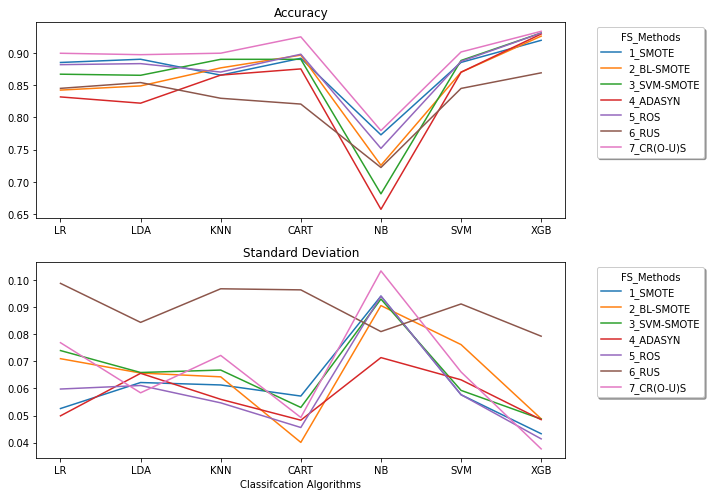

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
classification_comparison.T.max()

LR      0.8995
LDA     0.8973
KNN     0.8996
CART    0.9250
NB      0.7794
SVM     0.9015
XGB     0.9336
dtype: float64

In [ ]:
Imbalance= classification_comparison.T.max()

In [ ]:
classification_comparison.T['CART']

FS_Methods   values
1_SMOTE      Acc       0.8917
             SD        0.0572
2_BL-SMOTE   Acc       0.8966
             SD        0.0401
3_SVM-SMOTE  Acc       0.8901
             SD        0.0530
4_ADASYN     Acc       0.8752
             SD        0.0483
5_ROS        Acc       0.8980
             SD        0.0456
6_RUS        Acc       0.8206
             SD        0.0964
7_CR(O-U)S   Acc       0.9250
             SD        0.0493
Name: CART, dtype: float64

In [ ]:
classification_comparison.T['LDA']

FS_Methods   values
1_SMOTE      Acc       0.8902
             SD        0.0622
2_BL-SMOTE   Acc       0.8488
             SD        0.0657
3_SVM-SMOTE  Acc       0.8653
             SD        0.0659
4_ADASYN     Acc       0.8220
             SD        0.0656
5_ROS        Acc       0.8834
             SD        0.0611
6_RUS        Acc       0.8540
             SD        0.0844
7_CR(O-U)S   Acc       0.8973
             SD        0.0584
Name: LDA, dtype: float64

In [ ]:
classification_comparison.T['XGB']

FS_Methods   values
1_SMOTE      Acc       0.9196
             SD        0.0433
2_BL-SMOTE   Acc       0.9261
             SD        0.0488
3_SVM-SMOTE  Acc       0.9310
             SD        0.0487
4_ADASYN     Acc       0.9294
             SD        0.0485
5_ROS        Acc       0.9309
             SD        0.0414
6_RUS        Acc       0.8691
             SD        0.0793
7_CR(O-U)S   Acc       0.9336
             SD        0.0377
Name: XGB, dtype: float64

In [ ]:
methods_comparison['Imbalance']= Imbalance
methods_comparison

,FIll_NaN,Add_F,Outlier,Feature,Imbalance
LR,0.786,0.763,0.905,0.8932,0.8995
LDA,0.790,0.770,0.910,0.8847,0.8973
KNN,0.817,0.807,0.905,0.8827,0.8996
CART,0.878,0.868,0.880,0.8630,0.9250
NB,0.780,0.760,0.739,0.8697,0.7794
SVM,0.850,0.850,0.908,0.8825,0.9015
XGB,0.889,0.889,0.920,0.9035,0.9336


## Selected imbalance mehods

The max accuracy was by using Random Over Sampler

In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values
all_inputs.shape

(655, 18)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
all_inputs, all_labels = oversample.fit_resample(all_inputs, all_labels)
pd.value_counts(all_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    428
0    428
dtype: int64

# Step 5:  Building the classifier

## **1.** XGBoost Classifier

### Confusion Matrix & Tuning

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = XGBClassifier(n_estimators=31,
                           criterion= 'entropy', 
                           )
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9166666666666666
--------------------------------------------------------
------- Confusion Matrix --------

[[69  4]
 [ 9 74]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        73
           1       0.95      0.89      0.92        83

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156

--------------------------------------------------------


In [ ]:
XGB=[]
XGB.append(0.916)


### Preprocessing Methods Comparison


1.   Standard Scaler
2.   Min Max Scaler
3.   Max Abs Scaler
4. Robust Scaler
5. Power Transformer
6. Quantile Transformer (uniform output)
7. Quantile Transformer (Gaussian output)
8. Normalizer




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
scalers = []
scalers.append(('1.SS', StandardScaler()))
scalers.append(('2.MMS', MinMaxScaler()))
scalers.append(('3.MAS', MaxAbsScaler()))
scalers.append(('4.RPS', RobustScaler()))
scalers.append(('5.PT', PowerTransformer()))
scalers.append(('6.QTG', QuantileTransformer()))
scalers.append(('7.QTN', QuantileTransformer(output_distribution='normal')))
scalers.append(('8.NRM', Normalizer()))


In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

results_1 = []; names = []; seed=42
for name, scaler in scalers:
   
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    model = cls
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (466). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (466). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd

classification_comparison

,Accuracy,sd
1.SS,0.9018,0.0529
2.MMS,0.9018,0.0529
3.MAS,0.9018,0.0529
4.RPS,0.9018,0.0529
5.PT,0.9018,0.0529
6.QTG,0.9018,0.0529
7.QTN,0.9018,0.0529
8.NRM,0.8973,0.0523


### Cross-validation

''

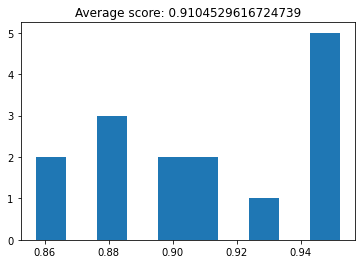

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
XGB.append(np.mean(cv_scores).round(3))
XGB

[0.916, 0.91]

## **2.** Extra Trees Classifier

### Confusion Matrix & Tuning

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = ExtraTreesClassifier(n_estimators=33,
                           criterion= 'entropy',
                           min_samples_split=6,
                           max_samples= 55,)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9038461538461539
--------------------------------------------------------
------- Confusion Matrix --------

[[94  9]
 [ 6 47]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       103
           1       0.84      0.89      0.86        53

    accuracy                           0.90       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.91      0.90      0.90       156

--------------------------------------------------------


In [ ]:
ETsC=[]
ETsC.append(0.903)

### Preprocessing Methods Comparison


1.   Standard Scaler
2.   Min Max Scaler
3.   Max Abs Scaler
4. Robust Scaler
5. Power Transformer
6. Quantile Transformer (uniform output)
7. Quantile Transformer (Gaussian output)
8. Normalizer




In [ ]:
all_inputs = df[df.columns[:-1]].values
all_labels = df['class'].values

results_1 = []; names = []; seed=42
for name, scaler in scalers:
   
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    model = cls
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (468). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (468). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:
classification_comparison= pd.DataFrame(index=[i for i in names])
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd

classification_comparison

,Accuracy,sd
1.SS,0.8784,0.0739
2.MMS,0.8891,0.0728
3.MAS,0.8870,0.0739
4.RPS,0.8846,0.0699
5.PT,0.8869,0.0718
6.QTG,0.8867,0.0719
7.QTN,0.8784,0.0712
8.NRM,0.8804,0.0811


### Cross-validation

''

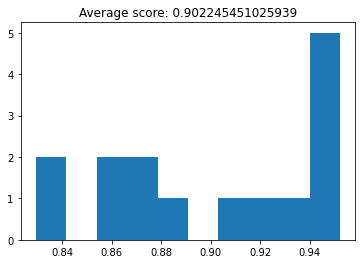

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
ETsC.append(np.mean(cv_scores).round(3))
ETsC

[0.903, 0.902]

## **3.** LGBM Classifier

### Confusion Matrix & Tuning

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import MaxAbsScaler
sc = MaxAbsScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = LGBMClassifier(num_leaves= 8,
                     learning_rate  = .29,
                     subsample_for_bin  = 20,
                     importance_type  ='gain')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9166666666666666
--------------------------------------------------------
------- Confusion Matrix --------

[[96  7]
 [ 6 47]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       103
           1       0.87      0.89      0.88        53

    accuracy                           0.92       156
   macro avg       0.91      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156

--------------------------------------------------------


In [ ]:
LGBM=[]
LGBM.append(0.916)

### Cross-validation

''

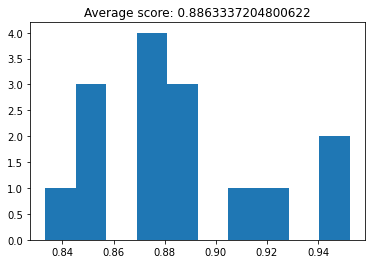

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
LGBM.append(np.mean(cv_scores).round(3))
LGBM

[0.916, 0.886]

## **4.** Decision Tree Classifier

### Confusion Matrix & Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': list(range(21,55,2)),
                  'max_features': list(range(1,8))}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8959293394777266
Best parameters: {'criterion': 'entropy', 'max_depth': 35, 'max_features': 7, 'splitter': 'best'}


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import MaxAbsScaler
sc = MaxAbsScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cls = DecisionTreeClassifier(criterion='entropy',
                             max_depth=35,
                             max_features=7,
                             splitter='best')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9166666666666666
--------------------------------------------------------
------- Confusion Matrix --------

[[93 10]
 [ 3 50]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       103
           1       0.83      0.94      0.88        53

    accuracy                           0.92       156
   macro avg       0.90      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156

--------------------------------------------------------


In [ ]:
DTC=[]
DTC.append(0.916)

### Cross-validation

''

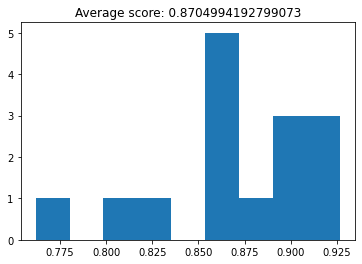

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(cls, all_inputs, all_labels, cv=15)
plt.hist(cv_scores,bins=9, stacked=True
         )
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
DTC.append(np.mean(cv_scores).round(3))
DTC

[0.916, 0.87]

In [ ]:
compile18im= pd.DataFrame(ETsC, index=['Acc','Val_acc'], columns=['ETsC'])
compile18im['XGB']= XGB
compile18im['LGBM']= LGBM
compile18im['DTC']= DTC
compile18im= compile18im.T
compile18im

,Acc,Val_acc
ETsC,0.903,0.902
XGB,0.916,0.910
LGBM,0.916,0.886
DTC,0.916,0.870


# Selected model

''

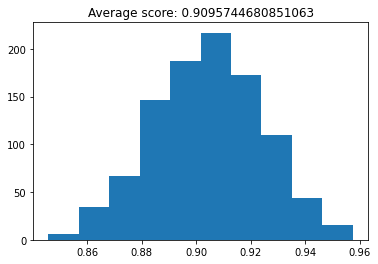

In [ ]:
cls = XGBClassifier(n_estimators=31,
                           criterion= 'entropy', 
                           )
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30)
    
    cls.fit(training_inputs, training_classes)
    classifier_accuracy = cls.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
plt.title('Average score: {}'.format(np.mean(classifier_accuracy)))

;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

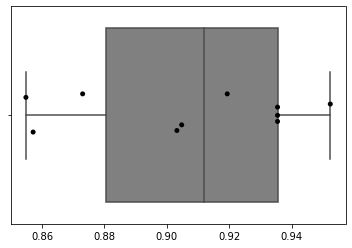

In [ ]:
dt_scores = cross_val_score(cls, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores, color='gray', )
sb.stripplot(dt_scores, jitter=True, color='black')
;

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


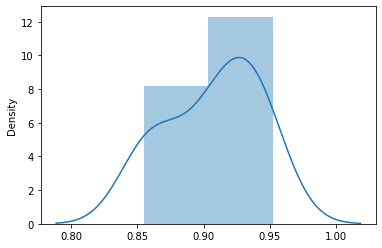

In [ ]:
sb.distplot(dt_scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


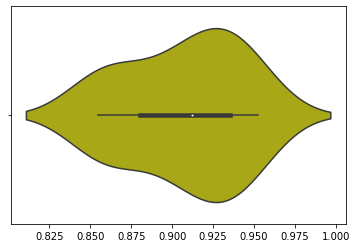

In [ ]:
sb.violinplot(dt_scores, color='y')

# Using Neural Networks

In [ ]:
pd.value_counts(all_labels)

NameError: ignored

In [ ]:
import tensorflow as tf
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, 
                                                      test_size=0.2, random_state=1,
                                                      stratify= all_labels )
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu', input_shape=[18]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model()

In [ ]:
del model

In [ ]:
Epochs = 90
history = model.fit(X_train, y_train,epochs=Epochs,
                    validation_split=0.2,)

Epoch 1/90
17/17 [==============================] - 1s 12ms/step - loss: 0.6130 - accuracy: 0.7303 - val_loss: 0.3794 - val_accuracy: 0.8538
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.8937 - val_loss: 0.3730 - val_accuracy: 0.8462
Epoch 3/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2290 - accuracy: 0.9157 - val_loss: 0.3845 - val_accuracy: 0.8615
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9009 - val_loss: 0.3643 - val_accuracy: 0.8615
Epoch 5/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.9404 - val_loss: 0.3891 - val_accuracy: 0.8692
Epoch 6/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9290 - val_loss: 0.3772 - val_accuracy: 0.8846
Epoch 7/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9174 - val_loss: 0.3706 - val_accuracy: 0.8692
Epoch 8/90
17/17 [=

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
85,0.011774,0.996146,2.059632,0.892308,85
86,0.022943,0.990366,2.339750,0.876923,86
87,0.012208,0.994220,2.091277,0.869231,87
88,0.014399,0.994220,2.109078,0.869231,88
89,0.012907,0.996146,2.204518,0.861538,89


In [ ]:
acc = (hist['accuracy'].tail().sum())*100/5 
val_acc = (hist['val_accuracy'].tail().sum())*100/5 

print("Training Accuracy = {}% and Validation Accuracy= {}%".format(acc,val_acc))

Training Accuracy = 99.42196607589722% and Validation Accuracy= 87.38461494445801%


In [ ]:
y_pred = model.predict_classes(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8466257668711656
--------------------------------------------------------
------- Confusion Matrix --------

[[66 15]
 [10 72]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        81
           1       0.83      0.88      0.85        82

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163

--------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Conclusion
>Best accuracy was by using **Extra Trees Classifier** with 89.4% accuracy, and an excellent validation accuracy (87.5 %).
The accuracy achieved by using: 
1. Forward filling the NaN, 
2. without using the extracted feature, 
3. DBSCAN Density-Based Spatial Clustering of Applications for outlier detection,
4. Random over sampler to balance the classes


# Step 6:  Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Hazim' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Hazim Tue Dec 29 2020 

CPython 3.6.9
IPython 5.5.0

numpy 1.19.4
pandas 1.1.5
sklearn 0.0
matplotlib 3.2.2
seaborn 0.11.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
